# Introductory application of neural networks to data analysis

In this notebook we give a condensed intro to the application of feed forward networks to a common data set without discussing deeply the theory and motivation. We try different network complexities, optimizers and activation functions to get a feeling for how they impact the minimization of the loss/error/cost function. Regularization techniques are not discussed here since we do not train for too many epochs and the overall scores are not too good to justify thir application to counter overfitting. For further discussion on different network architectures, we refer to repositories [here](https://github.com/andreaspts/DL_DEEPNET_vs_CONVNET_on_MNIST) and [here](https://github.com/andreaspts/DL_REC_vs_DEEP_and_CONVNN_on_TEMPERATURE_SERIES).

## 1) Single neuron

In [89]:
#import relevant data
from sklearn.linear_model import LogisticRegression

In [90]:
#define data 
X = [[50], [60], [70], [20], [10], [30]]

Y = [1,1,1,0,0,0]

In [91]:
model = LogisticRegression(C = 100000) #large C dampens regulatization
model.fit(X,Y)

/Users/Andreas/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=100000, class_weight=None, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='warn', n_jobs=None, penalty='l2', random_state=None,
          solver='warn', tol=0.0001, verbose=0, warm_start=False)

In [92]:
model.predict([[44]])

array([1])

In [93]:
model.predict_proba([[44]])

array([[0.08358881, 0.91641119]])

## 2 ) Simple neural network on fashion mnist

In the following we will discuss the application of simple feed forward neural networks onto the fashion mnist data set to classify item categories. The network architectures we use are implemented conveniently via keras. The data set can be retrieved from [here](https://github.com/zalandoresearch/fashion-mnist). A score board comparing different ml methods using classical scikit-learn algorithms and neural networks is found [here](http://fashion-mnist.s3-website.eu-central-1.amazonaws.com/).

In [94]:
import tensorflow
import keras

In [95]:
import gzip 
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plt

In [96]:
def open_images(filename):
    with gzip.open(filename, "rb") as file:
        data = file.read()
        return np.frombuffer(data, dtype = np.uint8, offset = 16)\
            .reshape(-1, 28, 28)\
            .astype(np.float32)
    
def open_labels(filename):
    with gzip.open(filename, "rb") as file:
        data = file.read()
        return np.frombuffer(data, dtype = np.uint8, offset = 8)

### One category 

In [97]:
#load data and define variables
X_train = open_images("train-images-idx3-ubyte.gz")
Y_train = open_labels("train-labels-idx1-ubyte.gz")

Y_train = (Y_train == 0) #just checking for the t-shirts

X_test = open_images("t10k-images-idx3-ubyte.gz")
Y_test = open_labels("t10k-labels-idx1-ubyte.gz")

Y_test = (Y_test == 0) #just checking for the t-shirts

In [98]:
X_train.shape

(60000, 28, 28)

In [99]:
X_train[1].shape

(28, 28)

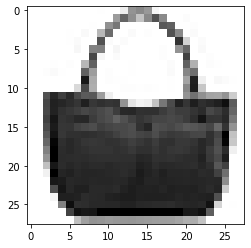

In [100]:
plt.imshow(X_train[100], cmap = "gray_r")
plt.show()

In [101]:
Y_train.shape

(60000,)

In [102]:
Y_train

array([False,  True,  True, ..., False,  True, False])

In [103]:
from keras import layers
from keras import models

In [104]:
#define model

model = models.Sequential()

model.add(layers.Dense(100, activation = "sigmoid", input_shape = (28 * 28,))) # we have 28*28 pixels
model.add(layers.Dense(1, activation = "sigmoid"))
model.summary()
model.compile(optimizer = "sgd", loss = "binary_crossentropy", metrics = ['accuracy'])

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_9 (Dense)              (None, 100)               78500     
_________________________________________________________________
dense_10 (Dense)             (None, 1)                 101       
Total params: 78,601
Trainable params: 78,601
Non-trainable params: 0
_________________________________________________________________


Stochastic gradient descent was employed as optimizer. Below we will use an improved version of gradient descent which tries to smoothen out oscillations in the descending procedure (gd with momentum, rmsprop or adam optimizers).

In [105]:
#illustration of different optimizers
from IPython.display import Image
Image(url='gdanimations.gif')  

In [106]:
#train model
#train on minibatches of 1000 to get an adjustment (thus 60 adjustments per epoch)
history = model.fit(X_train.reshape(60000, 784), Y_train, epochs = 10, batch_size = 1000)

Epoch 1/10
60000/60000 [==============================] - 1s 18us/step - loss: 0.2440 - acc: 0.9014
Epoch 2/10
60000/60000 [==============================] - 1s 15us/step - loss: 0.1752 - acc: 0.9300
Epoch 3/10
60000/60000 [==============================] - 1s 14us/step - loss: 0.1549 - acc: 0.9443
Epoch 4/10
60000/60000 [==============================] - 1s 14us/step - loss: 0.1437 - acc: 0.9478
Epoch 5/10
60000/60000 [==============================] - 1s 14us/step - loss: 0.1358 - acc: 0.9500
Epoch 6/10
60000/60000 [==============================] - 1s 13us/step - loss: 0.1308 - acc: 0.9510
Epoch 7/10
60000/60000 [==============================] - 1s 14us/step - loss: 0.1267 - acc: 0.9519
Epoch 8/10
60000/60000 [==============================] - 1s 14us/step - loss: 0.1240 - acc: 0.9523
Epoch 9/10
60000/60000 [==============================] - 1s 13us/step - loss: 0.1216 - acc: 0.9530
Epoch 10/10
60000/60000 [==============================] - 1s 13us/step - loss: 0.1193 - acc: 0.9533

False
[[0.00378084]]


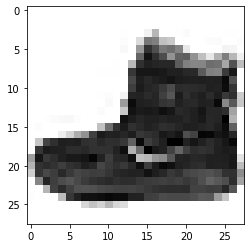

In [107]:
#check per hand prediction on training data vs. reality
plt.imshow(X_train[0], cmap = "gray_r")
print(Y_train[0])
print(model.predict(X_train[0].reshape(1, 784)))

True
[[0.83936864]]


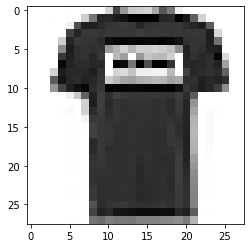

In [108]:
#check per hand prediction on training data vs. reality
plt.imshow(X_train[1],cmap = "gray_r")
print(Y_train[1])
print(model.predict(X_train[1].reshape(1, 784)))

In [109]:
#check the accuracy (per hand)
Y_train_pred = model.predict(X_train.reshape(60000, 784))
np.mean(np.round(Y_train_pred).reshape(-1) == Y_train)

0.9540833333333333

In [110]:
#check accuracy on training set via keras --> use output from fitting process
model.evaluate(X_train.reshape(60000, 784), Y_train)

60000/60000 [==============================] - 3s 45us/step


[0.11775630943874518, 0.9540833333333333]

In [111]:
print(model.metrics_names)

['loss', 'acc']


In [112]:
#check accuracy on test set via keras --> use output from fitting process
model.evaluate(X_test.reshape(10000, 784), Y_test)

10000/10000 [==============================] - 0s 45us/step


[0.12449604877829552, 0.9496]

In [113]:
# list all data in history
print(history.history.keys())

dict_keys(['loss', 'acc'])


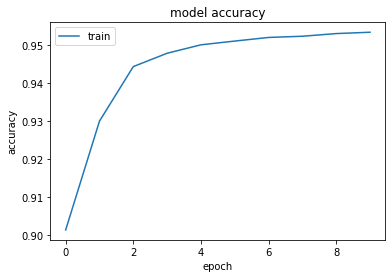

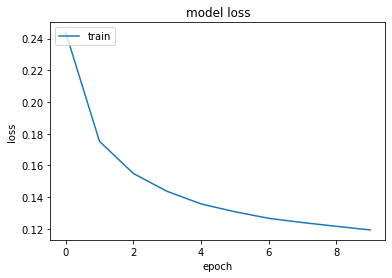

In [114]:
# summarize history for accuracy
plt.plot(history.history['acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train'], loc='upper left')
plt.show()

# summarize history for loss
plt.plot(history.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train'], loc='upper left')
plt.show()

### Many categories

To this aim: Modify final activation function, output dimension and loss function

In [115]:
#load data and define variables
X_train = open_images("train-images-idx3-ubyte.gz")
Y_train = open_labels("train-labels-idx1-ubyte.gz")

X_test = open_images("t10k-images-idx3-ubyte.gz")
Y_test = open_labels("t10k-labels-idx1-ubyte.gz")

In [116]:
from keras import layers
from keras import models
from keras.utils import to_categorical

In [117]:
#use one-hot-encoding
Y_train = to_categorical(Y_train)
Y_test = to_categorical(Y_test)

In [118]:
#define model (adapt to categorical situaton)

model = models.Sequential()

model.add(layers.Dense(2048, activation = "sigmoid", input_shape = (28 * 28,))) # we have 28*28 pixels
model.add(layers.Dense(256, activation = "sigmoid", input_shape = (28 * 28,))) # we have 28*28 pixels
model.add(layers.Dense(10, activation = "sigmoid"))
model.summary()
model.compile(optimizer = "adam", loss = "categorical_crossentropy", metrics = ['accuracy'])

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_11 (Dense)             (None, 2048)              1607680   
_________________________________________________________________
dense_12 (Dense)             (None, 256)               524544    
_________________________________________________________________
dense_13 (Dense)             (None, 10)                2570      
Total params: 2,134,794
Trainable params: 2,134,794
Non-trainable params: 0
_________________________________________________________________


In [119]:
#train model
#train on minibatches of 1000 to get an adjustment (thus 60 adjustments per epoch)
history = model.fit(X_train.reshape(60000, 784), Y_train, epochs = 10, batch_size = 1000)

Epoch 1/10
60000/60000 [==============================] - 15s 258us/step - loss: 0.8556 - acc: 0.7260
Epoch 2/10
60000/60000 [==============================] - 16s 259us/step - loss: 0.5199 - acc: 0.8221
Epoch 3/10
60000/60000 [==============================] - 15s 249us/step - loss: 0.4909 - acc: 0.8305
Epoch 4/10
60000/60000 [==============================] - 18s 306us/step - loss: 0.4864 - acc: 0.8289
Epoch 5/10
60000/60000 [==============================] - 17s 287us/step - loss: 0.4933 - acc: 0.8243
Epoch 6/10
60000/60000 [==============================] - 16s 263us/step - loss: 0.4796 - acc: 0.8283
Epoch 7/10
60000/60000 [==============================] - 15s 255us/step - loss: 0.4935 - acc: 0.8217
Epoch 8/10
60000/60000 [==============================] - 16s 259us/step - loss: 0.4851 - acc: 0.8250
Epoch 9/10
60000/60000 [==============================] - 16s 261us/step - loss: 0.4862 - acc: 0.8233
Epoch 10/10
60000/60000 [==============================] - 15s 252us/step - loss: 

In [120]:
#check accuracy on training set via keras --> use output from fitting process
model.evaluate(X_train.reshape(60000, 784), Y_train)

60000/60000 [==============================] - 14s 234us/step


[0.4635373484134674, 0.8362166666666667]

In [121]:
#check accuracy on test set via keras --> use output from fitting process
model.evaluate(X_test.reshape(10000, 784), Y_test)

10000/10000 [==============================] - 2s 231us/step


[0.5011240222454071, 0.8235]

In [122]:
# list all data in history
print(history.history.keys())

dict_keys(['loss', 'acc'])


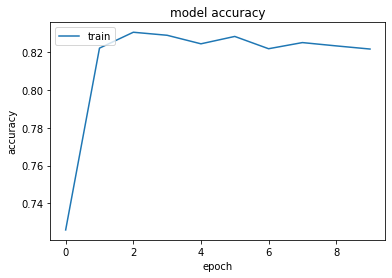

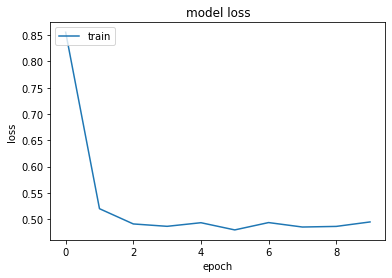

In [123]:
# summarize history for accuracy
plt.plot(history.history['acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train'], loc='upper left')
plt.show()

# summarize history for loss
plt.plot(history.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train'], loc='upper left')
plt.show()

In [124]:
#model evaluation via confusion matrix (helps to see if classes are well discerned)
Y_pred = model.predict(X_test.reshape(-1, 784))

#check for which category the highest estimate was produced for all examples in the test set
np.argmax(Y_pred, axis = 1)

array([9, 2, 1, ..., 8, 1, 5])

In [125]:
from pandas_ml import ConfusionMatrix

In [126]:
ConfusionMatrix(np.argmax(Y_test, axis = 1), np.argmax(Y_pred, axis = 1))

Predicted     0    1     2     3     4    5    6     7     8     9  __all__
Actual                                                                     
0           801    4    22    59     7    0   92     0    14     1     1000
1             4  940    13    34     7    0    0     0     2     0     1000
2            13    1   739     9   145    0   87     0     6     0     1000
3            20   12    12   871    30    0   51     0     4     0     1000
4             0    0   144    53   696    0  101     0     6     0     1000
5             1    0     0     1     0  862    0    63     4    69     1000
6           169    3   138    40   111    0  513     0    26     0     1000
7             0    0     0     0     0   12    0   954     1    33     1000
8             2    1    19     5     6    1   23     6   936     1     1000
9             1    0     0     0     0    5    0    70     1   923     1000
__all__    1011  961  1087  1072  1002  880  867  1093  1000  1027    10000

For example: Column "2" line "0": 27 is to be read as: Predicted was category "2" when it was actually category "0". In this way, the confusion matrix allows to see how well our model maps the reality. Ideally, we would like to have a model with vanishing off-diagonal terms.

#### Introducing the softmax as final layer activation function

In [127]:
#define model (adapt to categorical situaton)

model = models.Sequential()

model.add(layers.Dense(2048, activation = "sigmoid", input_shape = (28 * 28,))) # we have 28*28 pixels
model.add(layers.Dense(256, activation = "sigmoid", input_shape = (28 * 28,))) # we have 28*28 pixels
model.add(layers.Dense(10, activation = "softmax"))
model.summary()
model.compile(optimizer = "rmsprop", loss = "categorical_crossentropy", metrics = ['accuracy'])

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_14 (Dense)             (None, 2048)              1607680   
_________________________________________________________________
dense_15 (Dense)             (None, 256)               524544    
_________________________________________________________________
dense_16 (Dense)             (None, 10)                2570      
Total params: 2,134,794
Trainable params: 2,134,794
Non-trainable params: 0
_________________________________________________________________


In [128]:
#train model
#train on minibatches of 1000 to get an adjustment (thus 60 adjustments per epoch)
history = model.fit(X_train.reshape(60000, 784), Y_train, epochs = 10, batch_size = 1000)

Epoch 1/10
60000/60000 [==============================] - 14s 236us/step - loss: 0.9679 - acc: 0.6526
Epoch 2/10
60000/60000 [==============================] - 14s 235us/step - loss: 0.6288 - acc: 0.7630
Epoch 3/10
60000/60000 [==============================] - 15s 243us/step - loss: 0.5655 - acc: 0.7887
Epoch 4/10
60000/60000 [==============================] - 15s 246us/step - loss: 0.5253 - acc: 0.7993
Epoch 5/10
60000/60000 [==============================] - 16s 267us/step - loss: 0.4985 - acc: 0.8124
Epoch 6/10
60000/60000 [==============================] - 16s 269us/step - loss: 0.4809 - acc: 0.8175
Epoch 7/10
60000/60000 [==============================] - 17s 281us/step - loss: 0.4652 - acc: 0.8246
Epoch 8/10
60000/60000 [==============================] - 16s 266us/step - loss: 0.4555 - acc: 0.8318
Epoch 9/10
60000/60000 [==============================] - 16s 274us/step - loss: 0.4531 - acc: 0.8285
Epoch 10/10
60000/60000 [==============================] - 17s 276us/step - loss: 

We observe that the tanh and sigmoid activations work better on this problem than relu.

In [129]:
#check accuracy on training set via keras --> use output from fitting process
model.evaluate(X_train.reshape(60000, 784), Y_train)

60000/60000 [==============================] - 13s 213us/step


[0.3949452796717485, 0.8547666666666667]

In [130]:
#check accuracy on test set via keras --> use output from fitting process
model.evaluate(X_test.reshape(10000, 784), Y_test)

10000/10000 [==============================] - 2s 223us/step


[0.436017037320137, 0.843]

In [131]:
from pandas_ml import ConfusionMatrix

In [132]:
#model evaluation via confusion matrix (helps to see if classes are well discerned)
Y_pred = model.predict(X_test.reshape(-1, 784))

#check for which category the highest estimate was produced for all examples in the test set
np.argmax(Y_pred, axis = 1)

array([9, 2, 1, ..., 8, 1, 5])

In [133]:
ConfusionMatrix(np.argmax(Y_test, axis = 1), np.argmax(Y_pred, axis = 1))

Predicted    0    1    2    3     4    5     6     7     8    9  __all__
Actual                                                                  
0          799    1    8   32     3    0   145     0    12    0     1000
1            5  949    7   30     4    0     3     0     2    0     1000
2           11    1  629    7   226    1   118     0     7    0     1000
3           33    7    5  856    43    0    53     0     3    0     1000
4            1    1   60   29   802    0   103     0     4    0     1000
5            0    0    0    1     0  938     0    42     1   18     1000
6          144    0   91   23   107    0   620     0    15    0     1000
7            0    0    0    0     0   21     0   951     0   28     1000
8            1    0    6    4     5    3    20     5   956    0     1000
9            0    0    0    0     0   13     0    56     1  930     1000
__all__    994  959  806  982  1190  976  1062  1054  1001  976    10000

We understand from the different scores (training and test scores are pretty close) that by increaing the network capacity more statistical intricacies of the data set could be unveiled. 

If they were to far from each other (while the training score would be good) the complexity would be to big and we would observe overfitting.

If both scores would be bad, more data could help.

## 3 ) Simple convolutional neural network on fashion mnist

In [134]:
#import relevant packages

import tensorflow
import keras

import gzip 
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plt

from keras import layers
from keras import models
from keras.utils import to_categorical

from pandas_ml import ConfusionMatrix

In [135]:
def open_images(filename):
    with gzip.open(filename, "rb") as file:
        data = file.read()
        return np.frombuffer(data, dtype = np.uint8, offset = 16)\
            .reshape(-1, 28, 28)\
            .astype(np.float32)
    
def open_labels(filename):
    with gzip.open(filename, "rb") as file:
        data = file.read()
        return np.frombuffer(data, dtype = np.uint8, offset = 8)

In [136]:
#load data and define variables
X_train = open_images("train-images-idx3-ubyte.gz")
Y_train = open_labels("train-labels-idx1-ubyte.gz")

X_test = open_images("t10k-images-idx3-ubyte.gz")
Y_test = open_labels("t10k-labels-idx1-ubyte.gz")

In [137]:
#use one-hot-encoding
Y_train = to_categorical(Y_train)
Y_test = to_categorical(Y_test)

In [138]:
#define model (adapt to categorical situaton)
#first conv layer 10 filters, size (3,3)

model = models.Sequential()

model.add(layers.Conv2D(30, kernel_size = (3,3), activation = "relu", input_shape = (28, 28, 1))) # we have 28*28 pixels
model.add(layers.Flatten())
model.add(layers.Dense(256, activation = "sigmoid"))
model.add(layers.Dense(10, activation = "softmax"))
model.summary()
model.compile(optimizer = "adam", loss = "categorical_crossentropy", metrics = ['accuracy'])

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_8 (Conv2D)            (None, 26, 26, 30)        300       
_________________________________________________________________
flatten_5 (Flatten)          (None, 20280)             0         
_________________________________________________________________
dense_17 (Dense)             (None, 256)               5191936   
_________________________________________________________________
dense_18 (Dense)             (None, 10)                2570      
Total params: 5,194,806
Trainable params: 5,194,806
Non-trainable params: 0
_________________________________________________________________


In [139]:
#train model
#train on minibatches of 1000 to get an adjustment (thus 60 adjustments per epoch)
history = model.fit(X_train.reshape(60000, 28, 28, 1), Y_train, epochs = 10, batch_size = 1000)

Epoch 1/10
60000/60000 [==============================] - 62s 1ms/step - loss: 1.2470 - acc: 0.6988
Epoch 2/10
60000/60000 [==============================] - 59s 978us/step - loss: 0.6008 - acc: 0.8227
Epoch 3/10
60000/60000 [==============================] - 62s 1ms/step - loss: 0.4385 - acc: 0.8574
Epoch 4/10
60000/60000 [==============================] - 64s 1ms/step - loss: 0.3746 - acc: 0.8756
Epoch 5/10
60000/60000 [==============================] - 58s 968us/step - loss: 0.3440 - acc: 0.8834
Epoch 6/10
60000/60000 [==============================] - 58s 966us/step - loss: 0.3172 - acc: 0.8907
Epoch 7/10
60000/60000 [==============================] - 59s 987us/step - loss: 0.2965 - acc: 0.8970
Epoch 8/10
60000/60000 [==============================] - 58s 970us/step - loss: 0.2837 - acc: 0.9001
Epoch 9/10
60000/60000 [==============================] - 58s 960us/step - loss: 0.2688 - acc: 0.9054
Epoch 10/10
60000/60000 [==============================] - 58s 975us/step - loss: 0.2575

In [140]:
#check accuracy on training set via keras --> use output from fitting process
model.evaluate(X_train.reshape(60000, 28, 28, 1), Y_train)

60000/60000 [==============================] - 26s 438us/step


[0.24787114770213764, 0.91335]

In [141]:
#check accuracy on test set via keras --> use output from fitting process
model.evaluate(X_test.reshape(10000, 28, 28, 1), Y_test)

10000/10000 [==============================] - 4s 397us/step


[0.31888016719818113, 0.8871]

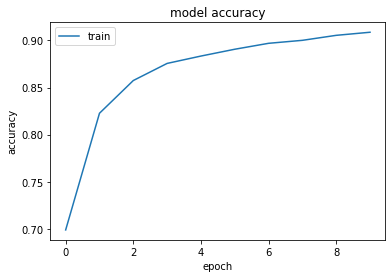

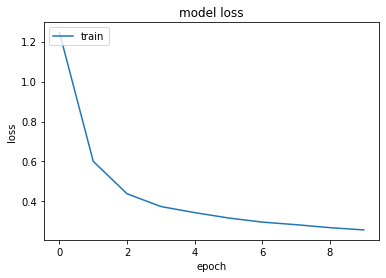

In [142]:
# summarize history for accuracy
plt.plot(history.history['acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train'], loc='upper left')
plt.show()

# summarize history for loss
plt.plot(history.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train'], loc='upper left')
plt.show()

In [143]:
#model evaluation via confusion matrix (helps to see if classes are well discerned)
Y_pred = model.predict(X_test.reshape(-1, 28, 28, 1))

#check for which category the highest estimate was produced for all examples in the test set
np.argmax(Y_pred, axis = 1)

ConfusionMatrix(np.argmax(Y_test, axis = 1), np.argmax(Y_pred, axis = 1))

Predicted     0    1     2     3    4     5    6     7     8     9  __all__
Actual                                                                     
0           866    0    20    19    5     4   78     0     8     0     1000
1             0  959     2    27    4     0    6     0     2     0     1000
2            13    0   838     8   80     0   60     0     1     0     1000
3            19    2    15   917   23     0   23     0     1     0     1000
4             1    1   109    39  779     0   71     0     0     0     1000
5             0    0     0     0    0   974    0    17     0     9     1000
6           133    1   105    35   65     0  646     0    15     0     1000
7             0    0     0     0    0    17    0   954     0    29     1000
8             3    1     3     4    2     2    6     3   976     0     1000
9             0    0     0     0    0     9    0    28     1   962     1000
__all__    1035  964  1092  1049  958  1006  890  1002  1004  1000    10000

In [144]:
#visualize weights of layer 0
import keras.backend as K

data = K.eval(model.layers[0].weights[0])
#weights of filter 1
data0 = data[:, :, :, 12].reshape(3, 3)

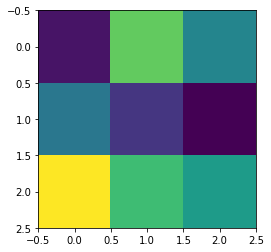

In [145]:
#visualize filter
plt.imshow(data0)
plt.show()

These results may be compared to the so-called Sobel operator used in image processing for edge detection, see [here](https://en.wikipedia.org/wiki/Sobel_operator) and compare directly to the teXed matrices in:

$\mathbf{G}_x = \begin{bmatrix} 
 +1 & 0 & -1  \\
+2 & 0 & -2 \\
+1 & 0 & -1 
\end{bmatrix} * \mathbf{A}
\quad
\mbox{and}
\quad   
\mathbf{G}_y = \begin{bmatrix} 
 +1 & +2 & +1\\
 0 & 0 & 0 \\
-1 & -2 & -1
\end{bmatrix} * \mathbf{A}$

In [146]:
#visualize activations
#retrieve them from the model architecture; try different activations to see the change
model2 = models.Sequential()

model2.add(layers.Conv2D(30, kernel_size = (3,3), 
                         activation = "tanh", 
                         input_shape = (28, 28, 1),
                         weights = model.layers[0].get_weights())) # we have 28*28 pixels

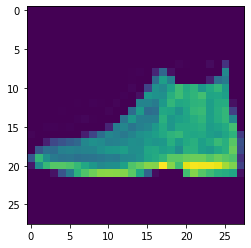

In [147]:
plt.imshow(X_test[0])
plt.show()

In [148]:
result = model2.predict(X_test[0].reshape(1, 28, 28, 1))

In [149]:
result.shape

(1, 26, 26, 30)

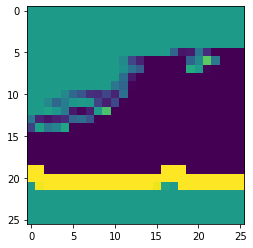

In [150]:
#plot activations of filter 0
plt.imshow(result[0][:, :, 0])
plt.show()

### Max pooling layers

Intuition: reduces complexity as it condenses information from a bunch of pixels (supposed to be similar) down as it takes their maximum (filters it out and passes it on)

-often after a conv layer

-network generalizes more and better

-number of outputs lower (less computational cost)

Notice: The max pooling layer is a filter the weights of which are fixed and are not learnt by the fitting procedure!

In [151]:
#define model (adapt to categorical situaton)
#first conv layer 10 filters, size (3,3)

model = models.Sequential()

model.add(layers.Conv2D(30, kernel_size = (3,3), activation = "relu", input_shape = (28, 28, 1))) # we have 28*28 pixels
model.add(layers.MaxPooling2D(pool_size = (2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(256, activation = "sigmoid"))
model.add(layers.Dense(10, activation = "softmax"))
model.summary()
model.compile(optimizer = "adam", loss = "categorical_crossentropy", metrics = ['accuracy'])

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_10 (Conv2D)           (None, 26, 26, 30)        300       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 13, 13, 30)        0         
_________________________________________________________________
flatten_6 (Flatten)          (None, 5070)              0         
_________________________________________________________________
dense_19 (Dense)             (None, 256)               1298176   
_________________________________________________________________
dense_20 (Dense)             (None, 10)                2570      
Total params: 1,301,046
Trainable params: 1,301,046
Non-trainable params: 0
_________________________________________________________________


In [152]:
#train model
#train on minibatches of 1000 to get an adjustment (thus 60 adjustments per epoch)
history = model.fit(X_train.reshape(60000, 28, 28, 1), Y_train, epochs = 10, batch_size = 1000)

Epoch 1/10
60000/60000 [==============================] - 30s 496us/step - loss: 0.8820 - acc: 0.7480
Epoch 2/10
60000/60000 [==============================] - 31s 510us/step - loss: 0.4386 - acc: 0.8587
Epoch 3/10
60000/60000 [==============================] - 30s 506us/step - loss: 0.3495 - acc: 0.8829
Epoch 4/10
60000/60000 [==============================] - 30s 505us/step - loss: 0.3041 - acc: 0.8960
Epoch 5/10
60000/60000 [==============================] - 31s 512us/step - loss: 0.2792 - acc: 0.9026
Epoch 6/10
60000/60000 [==============================] - 29s 479us/step - loss: 0.2585 - acc: 0.9085
Epoch 7/10
60000/60000 [==============================] - 31s 515us/step - loss: 0.2422 - acc: 0.9148
Epoch 8/10
60000/60000 [==============================] - 29s 488us/step - loss: 0.2292 - acc: 0.9190
Epoch 9/10
60000/60000 [==============================] - 29s 477us/step - loss: 0.2192 - acc: 0.9216
Epoch 10/10
60000/60000 [==============================] - 29s 480us/step - loss: 

In [153]:
#check accuracy on training set via keras --> use output from fitting process
model.evaluate(X_train.reshape(60000, 28, 28, 1), Y_train)

60000/60000 [==============================] - 12s 208us/step


[0.19264636429746945, 0.93355]

In [154]:
#check accuracy on test set via keras --> use output from fitting process
model.evaluate(X_test.reshape(10000, 28, 28, 1), Y_test)

10000/10000 [==============================] - 2s 201us/step


[0.2658280455827713, 0.9018]

We see that the max_pooling layer improves the performance of the network.

### Dropout

Regularization to counter overfitting.

In [85]:
#define model (adapt to categorical situaton)
#first conv layer 10 filters, size (3,3)

model = models.Sequential()

model.add(layers.Conv2D(30, kernel_size = (3,3), activation = "relu", input_shape = (28, 28, 1))) # we have 28*28 pixels
model.add(layers.MaxPooling2D(pool_size = (2, 2)))
model.add(layers.Dropout(0.3))
model.add(layers.Flatten())
model.add(layers.Dense(256, activation = "sigmoid"))
model.add(layers.Dropout(0.3))
model.add(layers.Dense(10, activation = "softmax"))
model.summary()
model.compile(optimizer = "adam", loss = "categorical_crossentropy", metrics = ['accuracy'])

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_7 (Conv2D)            (None, 26, 26, 30)        300       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 13, 13, 30)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 13, 13, 30)        0         
_________________________________________________________________
flatten_4 (Flatten)          (None, 5070)              0         
_________________________________________________________________
dense_7 (Dense)              (None, 256)               1298176   
_________________________________________________________________
dropout_2 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_8 (Dense)              (None, 10)                2570      
Total para

In [86]:
#train model
#train on minibatches of 1000 to get an adjustment (thus 60 adjustments per epoch)
history = model.fit(X_train.reshape(60000, 28, 28, 1), Y_train, epochs = 10, batch_size = 1000)

Epoch 1/10
60000/60000 [==============================] - 34s 566us/step - loss: 0.8138 - acc: 0.7089
Epoch 2/10
60000/60000 [==============================] - 33s 556us/step - loss: 0.4878 - acc: 0.8250
Epoch 3/10
60000/60000 [==============================] - 36s 607us/step - loss: 0.4167 - acc: 0.8523
Epoch 4/10
60000/60000 [==============================] - 38s 637us/step - loss: 0.3800 - acc: 0.8647
Epoch 5/10
60000/60000 [==============================] - 37s 616us/step - loss: 0.3581 - acc: 0.8717
Epoch 6/10
60000/60000 [==============================] - 39s 651us/step - loss: 0.3400 - acc: 0.8782
Epoch 7/10
60000/60000 [==============================] - 40s 659us/step - loss: 0.3283 - acc: 0.8816
Epoch 8/10
60000/60000 [==============================] - 36s 608us/step - loss: 0.3158 - acc: 0.8870
Epoch 9/10
60000/60000 [==============================] - 35s 588us/step - loss: 0.3074 - acc: 0.8873
Epoch 10/10
60000/60000 [==============================] - 37s 612us/step - loss: 

In [87]:
#check accuracy on training set via keras --> use output from fitting process
print(model.evaluate(X_train.reshape(60000, 28, 28, 1), Y_train))

60000/60000 [==============================] - 14s 232us/step
[0.246747728429238, 0.9100333333333334]


In [88]:
#check accuracy on test set via keras --> use output from fitting process
print(model.evaluate(X_test.reshape(10000, 28, 28, 1), Y_test))

10000/10000 [==============================] - 2s 228us/step
[0.2916194279789925, 0.8928]


A nice visualization of the operations done by the layers of a network for digit classification can be found [here](https://www.cs.ryerson.ca/~aharley/vis/conv/flat.html).